In [1]:
import pathlib

import pandas as pd

from utils import (get_model_predictions, 
                   get_ribo_seq_data, 
                   get_misannotated_lncrnas, 
                   get_cncrnadb_data)
from plotting import get_ribo_seq_venn, intersection_dl_models_venn, cncrnadb_venn

In [2]:
DATA_DIR = pathlib.Path('../data')
FIG_DIR = pathlib.Path('../figures')

CNN_PREDS_DIR = DATA_DIR / 'model_predictions' / 'cnn_29_test_predict_hist.csv'
LSTM_PREDS_DIR = DATA_DIR / 'model_predictions' / 'lstm_29_test_predict_hist.csv'
TRNF_PREDS_DIR = DATA_DIR / 'model_predictions' / 'transformer_29_test_hist.csv'

RIBO_SEQ_DIR = DATA_DIR / 'ribo_seq' / 'results_from_db.txt'

CNCRNADB_DIR = DATA_DIR / 'cncrnadb' / 'cncRNAdb.txt'

LNCRNA_ID_MAP_DIR = DATA_DIR / 'id_mappings' / 'mart_export.txt'



MEAN_CUTOFF = 0.6
STD_CUTOFF = 0.4

DL_I = 'Transformer,\nCNN, LSTM\n Intersection'
DL_U = 'Transformer,\n CNN, LSTM\n  Union'

In [3]:
# all model predictions
cnn_preds = get_model_predictions(CNN_PREDS_DIR, LNCRNA_ID_MAP_DIR)
lstm_preds = get_model_predictions(LSTM_PREDS_DIR, LNCRNA_ID_MAP_DIR)
transf_preds = get_model_predictions(TRNF_PREDS_DIR, LNCRNA_ID_MAP_DIR)
# misannotated lncRNAs
cnn_m_lncrnas = get_misannotated_lncrnas(cnn_preds, MEAN_CUTOFF, STD_CUTOFF)
lstm_m_lncrnas = get_misannotated_lncrnas(lstm_preds, MEAN_CUTOFF, STD_CUTOFF)
transf_m_lncrnas = get_misannotated_lncrnas(transf_preds, MEAN_CUTOFF, STD_CUTOFF)

# DL Intersection

In [4]:
cnn_m_lncrnas.columns

Index(['id', 'gold_lab', 'mean', 'std', 'ids', 'Gene stable ID',
       'Transcript stable ID', 'Transcript stable ID version',
       'Protein stable ID', 'EntrezGene transcript name ID',
       'NCBI gene (formerly Entrezgene) ID'],
      dtype='object')

In [7]:
import numpy as np

In [11]:
cnn = cnn_m_lncrnas[['id', 'mean', 'std']]
lstm = lstm_m_lncrnas[['id', 'mean', 'std']]
transf = transf_m_lncrnas[['id', 'mean', 'std']]

merged = cnn.merge(lstm, how='outer', on='id', suffixes=('_cnn', '_lstm'))
merge2 = merged.merge(transf, how='outer', on='id', suffixes=('_', '_transformer'))
merge2['inCNN'] = [0 if pd.isnull(e) else 1 for e in merge2['mean_cnn']]
merge2['inLSTM'] = [0 if pd.isnull(e) else 1 for e in merge2['mean_lstm']]
merge2['inTransformer'] = [0 if pd.isnull(e) else 1 for e in merge2['mean']]

merge2.to_csv('all_preds.csv')

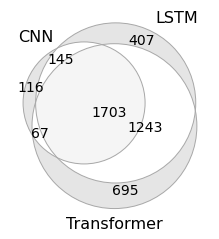

In [4]:
save_dir = FIG_DIR / 'dl_intersections_misannot.pdf'
intersection_dl_models_venn(set(cnn_m_lncrnas['Gene stable ID']),
                            set(lstm_m_lncrnas['Gene stable ID']), 
                            set(transf_m_lncrnas['Gene stable ID']),
                            save=True, 
                            save_dir=save_dir)

# Ribo-seq

In [5]:
ribo = get_ribo_seq_data(RIBO_SEQ_DIR)
ribo

,Sorf ID,Chromosome,Sorf length,Transcript sequence,Annotation,Biotype,RPF coverage,RPF coverage uniformity,overlap with PC exons,Ensembl transcript ID,Rltm min Rchx,FLOSS score,Floss-Classification,Orfscore,Peak shift,PhastCon,PhyloP,cutoff p-value
30,andreev_2015:10029,1,19,CTGGATCACCTGCACAGCCTGGGTATCATTTACAGAGACCTCAAGC...,lncrna,retained_intron,0.28,-0.21,Yes,ENST00000474934,NaN,0.171793,Good,4.919491,NaN,0.9706,5.6498,0.003519
32,andreev_2015:100724,10,33,CTGGGCCCCTCGGGCCCATCAGAGGAGAACTTCGATATGGAGGCTT...,lncrna,processed_transcript,0.39,0.09,Yes,ENST00000477994,NaN,0.160567,Good,6.931582,NaN,0.8456,3.8967,0.012580
33,andreev_2015:100725,10,36,CTGGAGGACCTGGGCCCCTCGGGCCCATCAGAGGAGAACTTCGATA...,lncrna,processed_transcript,0.41,0.01,Yes,ENST00000477994,NaN,0.144048,Good,7.027359,NaN,0.8560,3.9229,0.003519
34,andreev_2015:100727,10,40,GTGCTTGGGGTCCTGGAGGACCTGGGCCCCTCGGGCCCATCAGAGG...,lncrna,processed_transcript,0.42,0.10,Yes,ENST00000477994,NaN,0.146371,Good,7.194900,NaN,0.8674,3.9517,0.003519
35,andreev_2015:100730,10,48,TTGGATGAGGTCATCTTCTCCTATGTGCTTGGGGTCCTGGAGGACC...,lncrna,processed_transcript,0.41,0.03,Yes,ENST00000477994,NaN,0.101420,Good,7.296097,NaN,0.8486,3.8387,0.006687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2626000,zur_2016:999897,7,31,ATGTGGATGGCCAAACCCACATGTTATTTGGCTCTGACCGGATGGA...,lncrna,retained_intron,0.57,-0.92,Yes,ENST00000473649,NaN,0.130168,Good,-9.666241,NaN,0.6213,1.5720,0.003234
2626001,zur_2016:999898,7,24,GTGGATGGCCAAACCCACATGTTATTTGGCTCTGACCGGATGGAGC...,lncrna,retained_intron,0.71,-0.41,Yes,ENST00000473649,NaN,0.131316,Good,-9.660588,NaN,0.6828,1.8159,0.003234
2626002,zur_2016:999899,7,29,ATGGCCAAACCCACATGTTATTTGGCTCTGACCGGATGGAGCTGCT...,lncrna,retained_intron,0.56,-1.16,Yes,ENST00000473649,NaN,0.095411,Good,-9.660588,NaN,0.6325,1.5949,0.003234
2626003,zur_2016:999961,7,16,ATGAAGCCTTTGAAGTGCCAGTCTATGAAGAGGCCGTGGTGGGACTAG,lncrna,processed_transcript,0.65,-0.69,Yes,ENST00000471161,NaN,0.304290,Good,6.809857,NaN,0.6547,1.5105,0.003234


In [6]:
dl_ids = set(cnn_preds['ids'])
ribo_ids = set(ribo['Ensembl transcript ID'])
masterIds = set.intersection(dl_ids, ribo_ids)
# dl_u = get_union_dl_models(cnn_m_lncrnas, lstm_m_lncrnas, transf_m_lncrnas, 'ids', masterIds)
dl_u = set.union(set(cnn_m_lncrnas['ids']),
                 set(lstm_m_lncrnas['ids']),
                 set(transf_m_lncrnas['ids']))

print(f'DL models contain {len(dl_ids)} RNAs')
print(f'Ribo-seq data contains {len(ribo_ids)} RNAs')
print(f'{len(masterIds)} RNAs are present in both datasets')

DL models contain 26727 RNAs
Ribo-seq data contains 23537 RNAs
1714 RNAs are present in both datasets


In [7]:
floss = ribo[(ribo['Floss-Classification'] == 'Good')]
floss = set(floss.loc[floss['Ensembl transcript ID'].isin(masterIds)]['Ensembl transcript ID'])

orfscore = ribo[(ribo['Orfscore'] > 6)]
orfscore = set(orfscore.loc[orfscore['Ensembl transcript ID'].isin(masterIds)]['Ensembl transcript ID'])

phylop = ribo[(ribo['PhyloP'] > 4)]
phylop = set(phylop.loc[phylop['Ensembl transcript ID'].isin(masterIds)]['Ensembl transcript ID'])

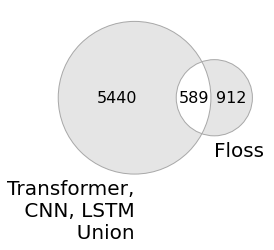

In [8]:
save_dir = FIG_DIR / 'union_floss.pdf'
get_ribo_seq_venn(dl_u, floss, DL_U, 'Floss', save=True, save_dir=save_dir)

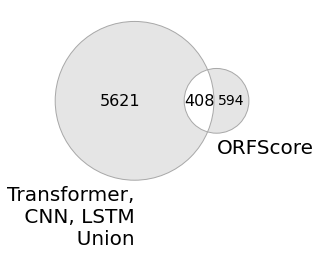

In [10]:
save_dir = FIG_DIR / 'union_orfscore.pdf'
get_ribo_seq_venn(dl_u, orfscore, DL_U, 'ORFScore', save=True, save_dir=save_dir, circle_number_size= [16, 14, 16])

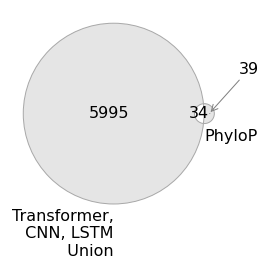

In [14]:
# save_dir = FIG_DIR / 'union_phylop.pdf'
# get_ribo_seq_venn(dl_u, phylop, DL_U, 'PhyloP', save=True, save_dir=save_dir, circle_number_size=[14, 14, 2])
import matplotlib.pyplot as plt
from matplotlib_venn import (venn2, venn2_circles, venn2_unweighted, venn3, venn3_circles)
import numpy as np
circle_number_size = [16, 0, 16]

plt.figure(figsize=(4,4))
out = venn2((dl_u, phylop), 
            (DL_U, 'PhyloP'),
            set_colors=('silver', 'silver'), )
            # alpha = 0.8)
venn2_circles((dl_u, phylop), 
            linestyle='-', 
            linewidth=1, 
            color='darkgrey')
for text in out.set_labels:
    text.set_fontsize(16)
for i, text in enumerate(out.subset_labels):
    text.set_fontsize(circle_number_size[i])

plt.annotate('39', xy=out.get_label_by_id('010').get_position() + np.array([0, 0]), 
             xytext=(40,40), ha='center',
             textcoords='offset points',
             arrowprops=dict(arrowstyle='->',connectionstyle='arc',color='gray'), fontsize=16)
save_dir = FIG_DIR / 'union_phylop.pdf'
plt.savefig(save_dir, dpi=200, bbox_inches='tight')

# cncRNAdb

In [15]:
cnc = get_cncrnadb_data(CNCRNADB_DIR)
cnc

,cncRNA_id,type,name,gene_id,chromosome,start_locus,end_locus,strand,peptide_length,tissue,organism,genomics,peptide_sequence
1,CNC_N_000002,circRNA,circGprc5a,ENSG00000013588,12,12891559,12917937,+,11,Bladder cancer stem cell,Homo sapiens,human Dec. 2013 (GRCh38/hg38),FDTKPMNLCGR
2,CNC_N_000003,circRNA,circLgr4,ENSG00000205213,11,27365961,27472790,-,19,293T cell;Colorectal tumor cell,Homo sapiens,human Dec. 2013 (GRCh38/hg38),LQTASDESYKDPTNIQLSK
3,CNC_N_000005,circRNA,circ-NCX1,ENSG00000183023,2,40097270,40611053,-,0,HEK-293 cell,Homo sapiens,human Dec. 2013 (GRCh38/hg38),NaN
4,CNC_N_000007,circRNA,hsa_circ_01271,ENSG00000164050,3,48403854,48430086,-,18,Brain,Homo sapiens,human Dec. 2013 (GRCh38/hg38),MEQLWPSSPASPSMCSGK
5,CNC_N_000008,circRNA,hsa_circ_04264,ENSG00000132912,5,150708440,150759109,-,13,Brain,Homo sapiens,human Dec. 2013 (GRCh38/hg38),MQQQSTMSWQNLK
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1855,CNC_N_001502,rRNA,SHLP6,ENSG00000210082,MT,2992,3051,+,20,Hela cell;Heart;Liver;Brain;Kidney;Spleen;Pros...,Homo sapiens,human Dec. 2013 (GRCh38/hg38),MLDQDIPMVQPLLKVRLFND
1856,CNC_N_001503,rRNA,SHLP5,ENSG00000210082,MT,2785,2856,+,24,Hela cell,Homo sapiens,human Dec. 2013 (GRCh38/hg38),MAPRGFSCLLLLTSEIDLPVKRRA
1857,CNC_N_001504,rRNA,SHLP4,ENSG00000210082,MT,2446,2524,-,26,Hela cell;Liver;Brain;Kidney;Spleen;Prostate;T...,Homo sapiens,human Dec. 2013 (GRCh38/hg38),MLEVMFLVNRRGKICRVPFTFFNLSL
1858,CNC_N_001811,lncRNA,APELA,ENSG00000248329,4,164877178,164898965,+,32,Xenopus laevis embryo;Human embryonic stem cells,Homo sapiens,human Dec. 2013 (GRCh38/hg38),QRPVNLTMRRKLRKHNCLQRRCMPLHSRVPFP


In [16]:
dl_ids = set(cnn_preds['Gene stable ID'])
cnc_ids = set(cnc['gene_id'])
masterIds = set.intersection(dl_ids, cnc_ids)
print(f'{len(dl_ids)} ids in DL\n{len(cnc_ids)} ids in cncRNAdb\n{len(masterIds)} ids in both\n')
cnc_ = set(cnc.loc[cnc['gene_id'].isin(masterIds)]['gene_id'])
dl_u = set.union(set(cnn_m_lncrnas['Gene stable ID']),
                 set(lstm_m_lncrnas['Gene stable ID']),
                 set(transf_m_lncrnas['Gene stable ID']))

15446 ids in DL
1277 ids in cncRNAdb
442 ids in both



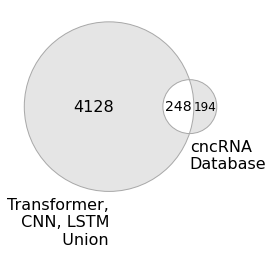

In [18]:
save_dir = FIG_DIR / 'dl_union_cncRNAdb.pdf'
cncrnadb_venn(dl_u, cnc_, DL_U, save=True, save_dir=save_dir, circle_name_size=16, circle_number_size=[16, 12, 14])